<p align="center">
<img src="https://github.com/datacamp/python-live-training-template/blob/master/assets/datacamp.svg?raw=True" alt = "DataCamp icon" width="50%">
</p>
<br><br>

## **Applied Machine Learning - Ensemble Modeling Live Training**

_Enter a brief description of your session, here's an example below:_

Welcome to this hands-on training where you will immerse yourself in applied machine learning in Python where we'll explore model stacking. Using `mlxtend`, `vecstack` and `sklearn.ensemble`, we'll learn how to create layers that are stacking-ready.

The foundations of model stacking:

* Create various types of baseline models, including linear and logistic regression using Scikit-Learn, for comparison to ensemble methods.
* Build layers, then stack them up.
* Calculate performance metrics.

## **The Datasets**


The first datasets we'll use is a CSV file named `pima-indians-diabetes.csv`, which contains data on females of Pima Indian heritage that are at least 21 years old. It contains the following columns:

- `n_preg`: Number of pregnancies
- `pl_glucose`: Plasma glucose concentration 2 hours after an oral glucose tolerance test
- `dia_bp`: Diastolic blood pressure (mm Hg)
- `tri_thick`: Triceps skin fold thickness (mm)
- `serum_ins`: 2-Hour serum insulin (mu U/ml)
- `bmi`: Body mass index (weight in kg/(height in m)^2)
- `diab_ped`: Diabetes pedigree function
- `age`: Age (years)
- `class`: Class variable (0 or 1)


## **Getting started**

In [35]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

In [38]:
# Read in the dataset
diabetes = pd.read_csv('https://github.com/datacamp/Applied-Machine-Learning-Ensemble-Modeling-live-training/blob/master/data/pima-indians-diabetes.csv?raw=true')

# Print header
diabetes.head()

,n_preg,pl_glucose,dia_bp,tri_thick,serum_ins,bmi,diab_ped,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
# Glimpse data to understand
diabetes.dtypes

n_preg          int64
pl_glucose      int64
dia_bp          int64
tri_thick       int64
serum_ins       int64
bmi           float64
diab_ped      float64
age             int64
class           int64
dtype: object

In [40]:
diabetes.describe()

,n_preg,pl_glucose,dia_bp,tri_thick,serum_ins,bmi,diab_ped,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [41]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   n_preg      768 non-null    int64  
 1   pl_glucose  768 non-null    int64  
 2   dia_bp      768 non-null    int64  
 3   tri_thick   768 non-null    int64  
 4   serum_ins   768 non-null    int64  
 5   bmi         768 non-null    float64
 6   diab_ped    768 non-null    float64
 7   age         768 non-null    int64  
 8   class       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [42]:
diab = diabetes.values
X, y = diab[:, :-1], diab[:, -1]
print('Shape: %s, %s' % (X.shape,y.shape))

Shape: (768, 8), (768,)


In [13]:
# minimally prepare dataset
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

In [17]:
# evaluate naive
naive = DummyClassifier(strategy='most_frequent')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(naive, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Baseline: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


Baseline: 0.651 (0.003)


In [18]:
# evaluate model
model = LogisticRegression(solver='newton-cg',penalty='l2',C=1)
m_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Good: %.3f (%.3f)' % (np.mean(m_scores), np.std(m_scores)))

Good: 0.773 (0.043)


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn import model_selection
from mlxtend.classifier import StackingCVClassifier

In [31]:
# set up the first layer
clf1 = KNeighborsClassifier(n_neighbors=100)
clf2 = RandomForestClassifier(random_state=1, n_estimators=300)
clf3 = GaussianNB()

In [32]:
# instantiate meta classifier and stacking classifier
lr = LogisticRegression(solver='lbfgs')
sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr, use_probas=True, cv=3)

In [33]:
# Do CV
for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, cv=3, scoring='roc_auc')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.77 (+/- 0.02) [KNN]
Accuracy: 0.83 (+/- 0.03) [Random Forest]
Accuracy: 0.81 (+/- 0.04) [Naive Bayes]
Accuracy: 0.83 (+/- 0.03) [StackingClassifier]


In [44]:
# evaluate a given model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [58]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

In [43]:
# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	return models

In [46]:
# evaluate a given model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [47]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


>lr 0.773 (0.040)
>knn 0.717 (0.040)
>cart 0.698 (0.059)
>svm 0.757 (0.040)
>bayes 0.759 (0.055)


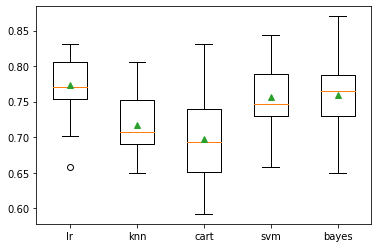

In [48]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [55]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [56]:
# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models

In [59]:
# get the models to evaluate
models = get_models()

>lr 0.773 (0.040)
>knn 0.717 (0.040)
>cart 0.705 (0.060)
>svm 0.757 (0.040)
>bayes 0.759 (0.055)
>stacking 0.769 (0.047)


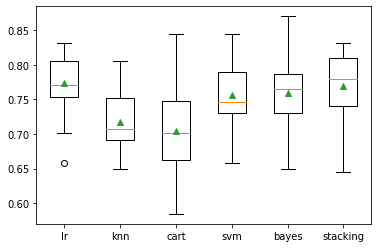

In [60]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()